### Graham Kerr
#### graham.s.kerr@NASA.gov; kerrg@cua.edu

<H1 font size="+3" style="color:red">
OZ project Project<br>
-- Cross Sections Examples
</H1>

<b>This notebook will plot cross sections from various sources, comparing their relative strengths, and how closely fit results represent either the data or calculations.
 


---
### <b style="color:blue"> Some set up </b>

***Import Modules***

In [492]:
##
## Import some modules
##

import sys
sys.path.insert(0,'/Users/gskerr1/Documents/Research/Python_Programs/radynpy/')
sys.path.insert(0,'/Users/gskerr1/Documents/Research/OrrallZirkerEffect/')


import radynpy
import OrrallZirkerPy as OZpy
# from OrrallZirkerPy import CrossSections


import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import LogLocator
from matplotlib import ticker
import matplotlib.colorbar as cb
import pandas as pd

import cmocean
import colorcet as ccet
import palettable as pal 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [564]:
import importlib
importlib.reload(OZpy.CrossSections)


<module 'OrrallZirkerPy.CrossSections' from '/Users/gskerr1/Documents/Research/OrrallZirkerEffect/OrrallZirkerPy/CrossSections.py'>

***Set up plot properties***

In [473]:
##
## Plot properties (these are just personal preference)
##

#Avenir LT Std
font = {'family': 'Avenir LT Std',
        'color':  'black',
        'weight': 'medium',
        'size': 22,
        }
plot_params = {'ytick.direction': 'in', 
               'xtick.direction': 'in', 
               'xtick.minor.visible': True,
               'ytick.minor.visible': True,
               'xtick.major.size': 10, 'xtick.minor.size': 5,
               'ytick.major.size': 10, 'ytick.minor.size': 5,
               'ytick.right': False,
               'xtick.top': False,
               'ytick.major.width': 1.5,
               'xtick.major.width': 1.5,
               'ytick.minor.width': 1.5,
               'xtick.minor.width': 1.5,
               'axes.linewidth': 1.5,
               'axes.spines.top': False,
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': False,
               'axes.titlepad' : 18 }

plot_lg_params = {'legend.frameon': False}
#plt.rcParams.update({'font.size': font['size'], 'font.family':font['family'], 'font.weight':font['weight'], 'font.color':font['color']})

plt.rcParams.update({'font.size':font['size'], 'font.family':font['family'], 'font.weight':font['weight']})
plt.rcParams.update({'ytick.direction': plot_params['ytick.direction'],
                     'xtick.direction': plot_params['xtick.direction'],
                     'xtick.minor.visible': plot_params['xtick.minor.visible'],
                     'ytick.minor.visible': plot_params['ytick.minor.visible'],
                     'ytick.major.size':  plot_params['ytick.major.size'], 
                     'ytick.minor.size':  plot_params['ytick.minor.size'],
                     'xtick.major.size':  plot_params['xtick.major.size'],                                
                     'xtick.minor.size':  plot_params['xtick.minor.size'],
                     'ytick.right': plot_params['ytick.right'],
                     'xtick.top': plot_params['xtick.top'],
                     'ytick.major.width': plot_params['ytick.major.width'],
                     'xtick.major.width': plot_params['xtick.major.width'],
                     'ytick.minor.width': plot_params['ytick.minor.width'],
                     'xtick.minor.width': plot_params['xtick.minor.width'],                    
                     'axes.linewidth': plot_params['axes.linewidth'],
                     'axes.spines.top' : plot_params['axes.spines.top'],
                     'axes.spines.bottom' : plot_params['axes.spines.bottom'],
                     'axes.spines.left' : plot_params['axes.spines.left'],
                     'axes.spines.right' : plot_params['axes.spines.right'],
                     'axes.titlepad' : plot_params['axes.titlepad'],
                    })

plt.rcParams.update({'legend.frameon': plot_lg_params['legend.frameon']})

mpl.mathtext.SHRINK_FACTOR = 0.6
mpl.mathtext.GROW_FACTOR = 1 / 0.6





template = dict(
        layout = go.Layout(font = dict(family = "Rockwell", size = 18),
                           title_font = dict(family = "Rockwell", size = 22), 
                           plot_bgcolor = 'white',
                           paper_bgcolor = 'white',
                           xaxis = dict(
                                showexponent = 'all',
                                exponentformat = 'e',
                                tickangle = 0,
                                linewidth = 4,
                                showgrid = True,
                            ),
                            yaxis = dict(
                          showexponent = 'all',
                          exponentformat = 'e',
                                linewidth = 4,
                                showgrid = True,
                                anchor = 'free',
                                position = 0,
                                domain = [0.0,1]
                            ),
                            coloraxis_colorbar = dict(
                                thickness = 15,
                                tickformat = '0.2f',
                                ticks = 'outside',
                                titleside = 'right'
                            )
                            ))

---
### <b style="color:blue"> Calculate or extract the cross sections </b>

***Set up the CrossSec object with requested energy values***

In [565]:
energy = np.arange(1, 1001, 1)
cs = OZpy.CrossSections.CrossSec(energy)

***Run the various functions***

In [566]:
f95 = cs.cs_fang95()
bw99 = cs.cs_bw99()
cheshire70 = OZpy.CrossSections.cs_cheshire70()
ludde82 = OZpy.CrossSections.cs_ludde82()
shakeshaft78 = OZpy.CrossSections.cs_shakeshaft78()
bates53 = OZpy.CrossSections.cs_bates53()
winter09 = OZpy.CrossSections.cs_winter09()
belkic92 = OZpy.CrossSections.cs_belkic92()

---
### <b style="color:blue"> Compare the various sources of data </b>
> - Overlays the original sources of data (some, e.g. Winter supercedes Shakeshaft)



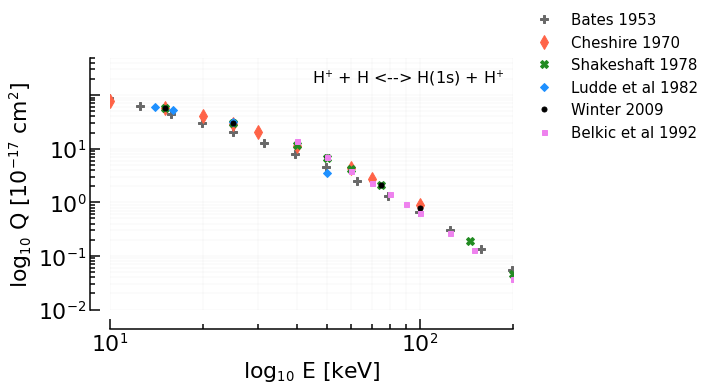

In [561]:
savepng = True
fname_out = 'Q_p1_DataComps_intE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(1s) + H$^{+}$'
xrange = [10, 200]
yrange = [1e-2, 500]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992']

if logx == True:
    xtitle = 'log$_{10}$ E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'log$_{10}$ Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[1]
                 )
line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(ludde82.energy, ludde82.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(winter09.energy, winter09.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[5]
                 )


leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5,line6],loc=(1.025,0.65), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

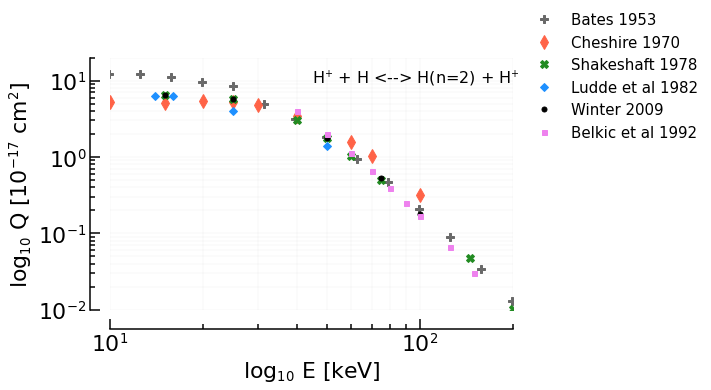

In [569]:
savepng = True
fname_out = 'Q_p2_DataComps_intE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=2) + H$^{+}$'
xrange = [10, 200]
yrange = [1e-2, 20]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992']

if logx == True:
    xtitle = 'log$_{10}$ E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'log$_{10}$ Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[1]
                 )
line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(ludde82.energy, ludde82.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(winter09.energy, winter09.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[4]
                 )
line6, = ax1.plot(belkic92.energy, belkic92.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'violet',
#                   zorder = 0, alpha = 0.35,
                   marker = 's', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[5]
                 )



leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5,line6],loc=(1.025,0.65), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

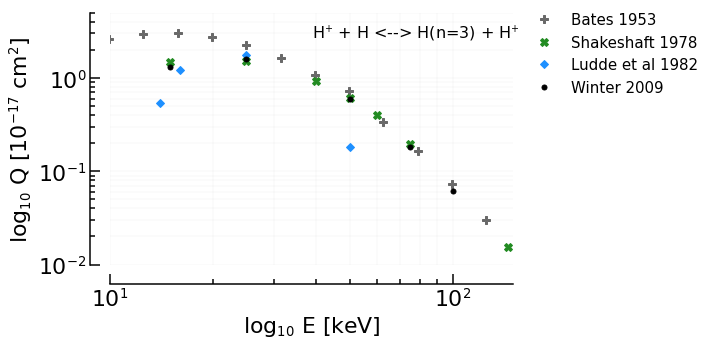

In [548]:
savepng = True
fname_out = 'Q_p3_DataComps_fuE'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=3) + H$^{+}$'
xrange = [10, 150]
yrange = [1e-2, 5]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Bates 1953', 'Cheshire 1970', 'Shakeshaft 1978',
          'Ludde et al 1982', 'Winter 2009', 'Belkic et al 1992']

if logx == True:
    xtitle = 'log$_{10}$ E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'log$_{10}$ Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(bates53.energy, bates53.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[0]
                 )

line3, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(ludde82.energy, ludde82.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(winter09.energy, winter09.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'black',
#                   zorder = 0, alpha = 0.35,
                   marker = 'o', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[4]
                 )



leg1 = ax1.legend(handles=[line1,line3,line4,line5],loc=(1.025,0.65), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

---
### <b style="color:blue"> Compare the fits to rates to the data </b>
> - Overlays the original sources of data with the fits that employed that data (BW99 & Fang95)

***Fang95 vs the underlying data***

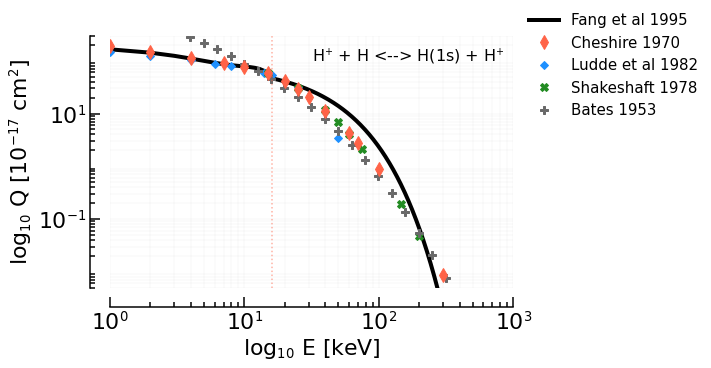

In [9]:
savepng = True
fname_out = 'Fang95_Q_p1_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(1s) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-3, 300]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Fang et al 1995', 'Cheshire 1970', 'Ludde et al 1982','Shakeshaft 1978','Bates 1953']

if logx == True:
    xtitle = 'log$_{10}$ E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'log$_{10}$ Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(f95.energy, f95.Q_p1,
                   linewidth = 4, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )
line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
                  zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[1]
                 )
line3, = ax1.plot(ludde82.energy, ludde82.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 5,
                   label = labels[2]
                 )
line4, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[3]
                 )
line5, = ax1.plot(bates53.energy, bates53.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5],loc=(1.025,0.65), fontsize = 15)

ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

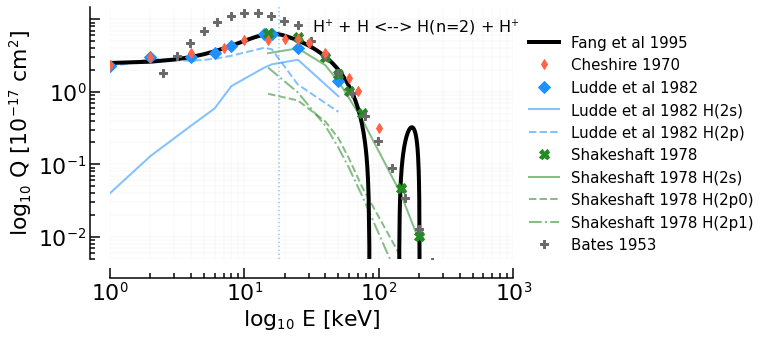

In [10]:
savepng = True
fname_out = 'Fang95_Q_p2_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=2) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-3, 15]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Fang et al 1995', 'Cheshire 1970', 'Ludde et al 1982','Shakeshaft 1978','Bates 1953']
labelssub = ['Shakeshaft 1978 H(2s)','Shakeshaft 1978 H(2p0)','Shakeshaft 1978 H(2p1)', 
             'Ludde et al 1982 H(2s)', 'Ludde et al 1982 H(2p)']

if logx == True:
    xtitle = 'log$_{10}$ E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'log$_{10}$ Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(f95.energy, f95.Q_p2,
                   linewidth = 4, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )
line2, = ax1.plot(cheshire70.energy, cheshire70.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
                  zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 7,
                   label = labels[1]
                 )
line3, = ax1.plot(ludde82.energy, ludde82.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[2]
                 )
line3a, = ax1.plot(ludde82.energy, ludde82.Q_p_2s,
                   linewidth = 2, linestyle = '-', color = 'dodgerblue',
                  zorder = 0, alpha = 0.55,
#                    marker = 'D', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labelssub[3]
                 )
line3b, = ax1.plot(ludde82.energy, ludde82.Q_p_2p,
                   linewidth = 2, linestyle = '--', color = 'dodgerblue',
                  zorder = 0, alpha = 0.55,
#                    marker = 'D', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labelssub[4]
                 )
line4, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[3]
                 )
line4a, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_2s,
                   linewidth = 2, linestyle = '-', color = 'forestgreen',
                  zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labelssub[0]
                 )
line4b, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_2p0,
                   linewidth = 2, linestyle = '--', color = 'forestgreen',
                  zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labelssub[1]
                 )
line4c, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_2p1,
                   linewidth = 2, linestyle = '-.', color = 'forestgreen',
                  zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labelssub[2]
                 )
line5, = ax1.plot(bates53.energy, bates53.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
leg1 = ax1.legend(handles=[line1,line2,line3,line3a,line3b,
                           line4,line4a,line4b,line4c,line5],loc=(1.025,0.), fontsize = 15)

ax1.axvline(x=18, color = 'dodgerblue', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

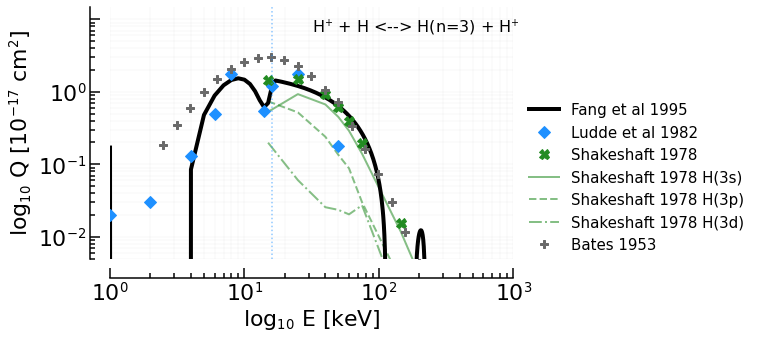

In [11]:
savepng = True
fname_out = 'Fang95_Q_p3_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=3) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-3, 15]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Fang et al 1995', 'Cheshire 1970', 'Ludde et al 1982','Shakeshaft 1978','Bates 1953']
labelssub = ['Shakeshaft 1978 H(3s)','Shakeshaft 1978 H(3p)','Shakeshaft 1978 H(3d)' 
            ]

if logx == True:
    xtitle = 'log$_{10}$ E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'log$_{10}$ Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(f95.energy, f95.Q_p3,
                   linewidth = 4, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )

line3, = ax1.plot(ludde82.energy, ludde82.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'D', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[2]
                 )
line4, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
#                   zorder = 0, alpha = 0.35,
                   marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[3]
                 )
line4a, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_3s,
                   linewidth = 2, linestyle = '-', color = 'forestgreen',
                  zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labelssub[0]
                 )
line4b, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_3p0+shakeshaft78.Q_p_3p1,
                   linewidth = 2, linestyle = '--', color = 'forestgreen',
                  zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labelssub[1]
                 )
line4c, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p_3d0+shakeshaft78.Q_p_3d1+shakeshaft78.Q_p_3d2,
                   linewidth = 2, linestyle = '-.', color = 'forestgreen',
                  zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
                   markersize = 10,
                   label = labelssub[2]
                 )
line5, = ax1.plot(bates53.energy, bates53.Q_p3,
                   linewidth = 0, linestyle = 'none', color = 'dimgrey',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )
leg1 = ax1.legend(handles=[line1,line3,
                           line4,line4a,line4b,line4c,line5],loc=(1.025,0.), fontsize = 15)

ax1.axvline(x=16, color = 'dodgerblue', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

***BW99 vs underlying data***
> - 1s (n=1)

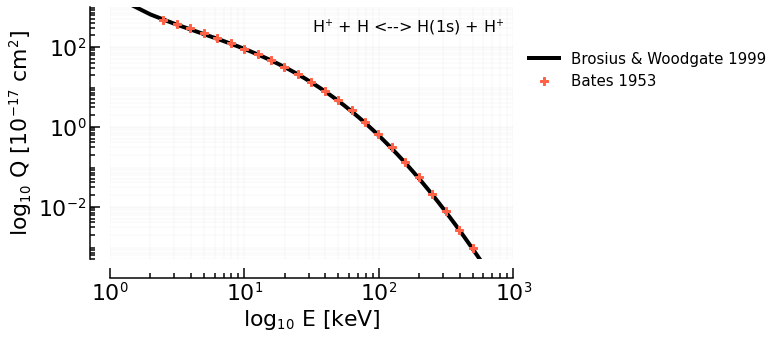

In [12]:
savepng = True
fname_out = 'BW99_Q_p1_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(1s) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-4, 1000]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Brosius & Woodgate 1999','Bates 1953']

if logx == True:
    xtitle = 'log$_{10}$ E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'log$_{10}$ Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        

line1, = ax1.plot(bw99.energy, bw99.Q_p1,
                   linewidth = 4, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )
line2, = ax1.plot(bates53.energy, bates53.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[1]
                 )

leg1 = ax1.legend(handles=[line1,line2],loc=(1.025,0.65), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

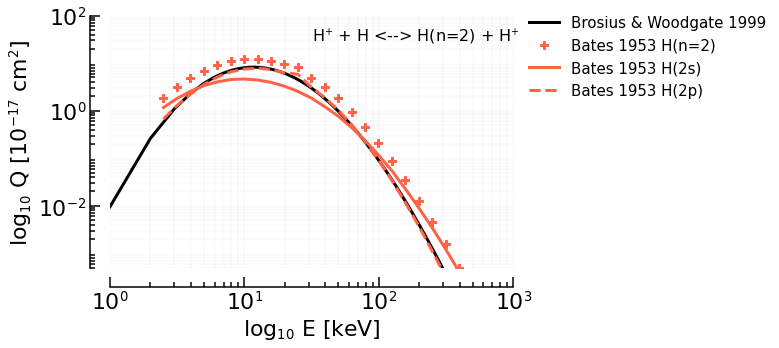

In [27]:
savepng = True
fname_out = 'BW99_Q_p2_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=2) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-4, 100]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Brosius & Woodgate 1999','Bates 1953 H(n=2)', 'Bates 1953 H(2s)', 'Bates 1953 H(2p)']

if logx == True:
    xtitle = 'log$_{10}$ E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'log$_{10}$ Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        

line1, = ax1.plot(bw99.energy, bw99.Q_p2,
                   linewidth = 3, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )
line2, = ax1.plot(bates53.energy, bates53.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 0, alpha = 0.55,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[1]
                 )
line3, = ax1.plot(bates53.energy, bates53.Q_p_2s,
                   linewidth = 3, linestyle = '-', color = 'tomato',
                  zorder = 50, alpha = 1.0,
#                    marker = 'd', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[2]
                 )

line4, = ax1.plot(bates53.energy, bates53.Q_p_2p,
                   linewidth = 3, linestyle = '--', color = 'tomato',
                  zorder = 50, alpha = 1,
#                    marker = 'D', markeredgewidth = 1, 
#                    markersize = 5,
                   label = labels[3]
                 )
leg1 = ax1.legend(handles=[line1,line2,line3,line4],loc=(1.025,0.65), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

***Fang95 vs the BW99***
> - 1s (n=1)

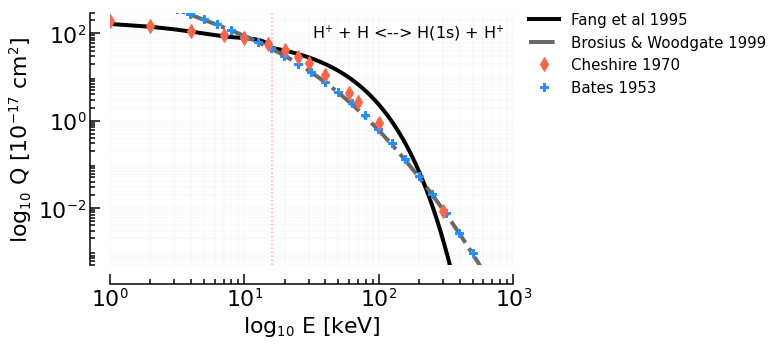

In [28]:
savepng = True
fname_out = 'Fang95_BW99_Q_p1_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(1s) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-4, 300]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Fang et al 1995', 'Brosius & Woodgate 1999', 'Cheshire 1970','Bates 1953']

if logx == True:
    xtitle = 'log$_{10}$ E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'log$_{10}$ Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(f95.energy, f95.Q_p1,
                   linewidth = 4, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )
line2, = ax1.plot(bw99.energy, bw99.Q_p1,
                   linewidth = 4, linestyle = '-.', color = 'dimgrey',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[1]
                 )
line3, = ax1.plot(cheshire70.energy, cheshire70.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
                  zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[2]
                 )
line4, = ax1.plot(bates53.energy, bates53.Q_p1,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[3]
                 )

leg1 = ax1.legend(handles=[line1,line2,line3,line4],loc=(1.025,0.65), fontsize = 15)

ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

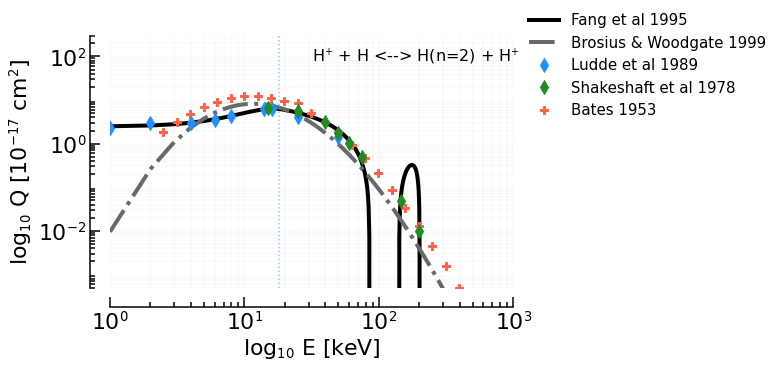

In [29]:
savepng = True
fname_out = 'Fang95_BW99_Q_p2_vs_data_comp'
dir1 = './'

logy = True
logx = True

csid = 'H$^{+}$ + H <--> H(n=2) + H$^{+}$'
xrange = [1, 1000]
yrange = [5e-4, 300]
cmaptemp = pal.cartocolors.qualitative.Safe_10.mpl_colors
colors = cmaptemp
labels = ['Fang et al 1995', 'Brosius & Woodgate 1999', 'Ludde et al 1989', 'Shakeshaft et al 1978','Bates 1953']

if logx == True:
    xtitle = 'log$_{10}$ E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'log$_{10}$ Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.5, 0.90, csid, color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(f95.energy, f95.Q_p2,
                   linewidth = 4, linestyle = '-', color = 'black',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[0]
                 )
line2, = ax1.plot(bw99.energy, bw99.Q_p2,
                   linewidth = 4, linestyle = '-.', color = 'dimgrey',
# #                   zorder = 0, alpha = 0.55,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 3,
                   label = labels[1]
                 )
line3, = ax1.plot(ludde82.energy, ludde82.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'dodgerblue',
                  zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[2]
                 )
line4, = ax1.plot(shakeshaft78.energy, shakeshaft78.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'forestgreen',
                  zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10,
                   label = labels[3]
                 )
line5, = ax1.plot(bates53.energy, bates53.Q_p2,
                   linewidth = 0, linestyle = 'none', color = 'tomato',
#                   zorder = 0, alpha = 0.35,
                   marker = 'P', markeredgewidth = 1, 
                   markersize = 8,
                   label = labels[4]
                 )

leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5],loc=(1.025,0.65), fontsize = 15)

ax1.axvline(x=18, color = 'dodgerblue', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()

In [130]:
shakeshaft78_fit = np.polynomial.polynomial.Polynomial.fit(np.log10(shakeshaft78.energy), np.log10(shakeshaft78.Q_p2), 4)
shakeshaft78_fit.convert().coef
shakeshaft78_fit_vals = np.polynomial.polynomial.Polynomial(shakeshaft78_fit.convert().coef)

In [207]:
cheshire70_fit = np.polynomial.polynomial.Polynomial.fit(np.log10(cheshire70.energy[6:]), np.log10(cheshire70.Q_p1[6:]), 3)
cheshire70_fit.convert().coef
cheshire70_fit_vals = np.polynomial.polynomial.Polynomial(cheshire70_fit.convert().coef)

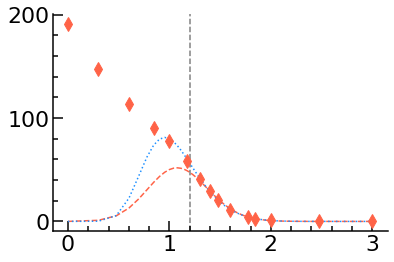

In [508]:
plt.plot(np.log10(f95.energy),10**(pfit_vals(np.log10(f95.energy))), color = 'tomato',linestyle = '--')
plt.plot(np.log10(f95.energy),10**(cfit_exp_vals(np.log10(f95.energy))), color = 'dodgerblue', linestyle = ':')
# plt.plot(np.log10(f95.energy[16:]),np.log10(test), color = 'forestgreen')
# plt.plot(np.log10(f95.energy[16:]),np.log10(test2), color = 'black')
# plt.plot(np.log10(f95.energy[16:]),np.log10(test3), color = 'dimgrey',linestyle='--')



# plt.plot(np.log10(f95.energy), np.log10(f95.Q_p1))

plt.plot(np.log10(cheshire70.energy), (cheshire70.Q_p1),
                   linewidth = 0, linestyle = 'none', color = 'tomato',
                  zorder = 50, alpha = 1,
                   marker = 'd', markeredgewidth = 1, 
                   markersize = 10
                 )
# plt.plot(np.log10(bates53.energy), np.log10(bates53.Q_p1),
#                    linewidth = 0, linestyle = 'none', color = 'dodgerblue',
#                   zorder = 50, alpha = 1,
#                    marker = 'd', markeredgewidth = 1, 
#                    markersize = 10
#                  )
# plt.ylim([-3,2])

plt.axvline(x=np.log10(16), linestyle = '--', color = 'black', alpha = 0.5)




In [499]:
pfit_exp_vals = OZpy.CrossSections.cs_polyfit(cheshire70.energy, cheshire70.Q_p1, emin = 16.0, 
                                                       order = 5, log10E = True, log10Q = True)


In [494]:
cfit_exp_vals = OZpy.CrossSections.cs_chebfit(cheshire70.energy, cheshire70.Q_p1, emin = 16.0, 
                                                       order = 5, log10E = True, log10Q = True)


In [460]:
popt_hyp, pcov_hyp = OZpy.CrossSections.cs_hyberbolfit(cheshire70.energy, cheshire70.Q_p1, emin = 16.0,
                                                      emax = 1000.0,boundsin=[0,3,0,2,0,np.inf])
test2 = OZpy.CrossSections.hyperbolic_fn(f95.energy[16:], 
                                  *popt_hyp)
popt_exp, pcov_exp = OZpy.CrossSections.cs_expfit(cheshire70.energy, cheshire70.Q_p1, emin = 16.0,
                                                      emax = 1000.0, boundsin=[0.1, 3, -5,5])
test3 = OZpy.CrossSections.exponential_fn(f95.energy[16:], 
                                  *popt_exp)

In [461]:
popt_exp

array([1.24200000e+02, 5.73708226e-02])

In [462]:
popt_hyp

array([1.24200000e+02, 2.12984744e-07, 5.73696109e-02])

In [464]:
test2

array([4.68340211e+01, 4.42227909e+01, 4.17571498e+01, 3.94289805e+01,
       3.72306183e+01, 3.51548258e+01, 3.31947691e+01, 3.13439953e+01,
       2.95964114e+01, 2.79462640e+01, 2.63881206e+01, 2.49168514e+01,
       2.35276129e+01, 2.22158313e+01, 2.09771882e+01, 1.98076055e+01,
       1.87032329e+01, 1.76604346e+01, 1.66757775e+01, 1.57460199e+01,
       1.48681010e+01, 1.40391304e+01, 1.32563791e+01, 1.25172701e+01,
       1.18193700e+01, 1.11603814e+01, 1.05381347e+01, 9.95058127e+00,
       9.39578692e+00, 8.87192512e+00, 8.37727122e+00, 7.91019674e+00,
       7.46916400e+00, 7.05272101e+00, 6.65949680e+00, 6.28819679e+00,
       5.93759861e+00, 5.60654802e+00, 5.29395514e+00, 4.99879088e+00,
       4.72008349e+00, 4.45691542e+00, 4.20842028e+00, 3.97377998e+00,
       3.75222204e+00, 3.54301706e+00, 3.34547630e+00, 3.15894941e+00,
       2.98282233e+00, 2.81651520e+00, 2.65948053e+00, 2.51120131e+00,
       2.37118940e+00, 2.23898385e+00, 2.11414941e+00, 1.99627512e+00,
      

In [471]:
cfit_exp_vals.coef

array([-2.02562723e+01,  3.40946508e+01, -1.52470882e+01,  3.80491959e+00,
       -5.21970376e-01,  2.88677744e-02])

In [511]:
5/6565.0*3e5

228.4843869002285